In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Загружаю объединенный датасет
work = pd.read_excel('C:/00_Projects/Rus_mushrooms/work.xlsx', sheet_name='regions_all')

In [3]:
work.shape

(78, 77)

In [4]:
# удаляю пустые столбцы

# столбцы в список
list_columns = list(work.columns)


# если столбец пустой, удаляю
for column_name in list_columns:
    if work[column_name].sum() == 0:
        work.drop(column_name, axis=1, inplace=True)

In [5]:
work.shape

(78, 71)

In [6]:
# удаляю чайный гриб

work.drop('чайный гриб', axis=1, inplace=True)

In [7]:
work.shape

(78, 70)

In [8]:
# складываю волнушки и удаляю отдельные столбцы

voln = ['волнушка', 'волнушка белая', 'волнушка розовая']

work['волнушки'] = work['волнушка'] + work['волнушка белая'] + work['волнушка розовая']

for voln_column in voln:
    work.drop(voln_column, axis=1, inplace=True)

In [9]:
# складываю шампиньоны и удаляю отдельные столбцы

work['шампиньоны'] = work['шампиньон'] + work['головач (шампиньон)']

work.drop('шампиньон', axis=1, inplace=True)
work.drop('головач (шампиньон)', axis=1, inplace=True)

In [10]:
work.shape

(78, 67)

In [11]:
# считаю количество видов по региону, максимальное значение и долю этого значения

work['total'] = work.iloc[:,1:66].sum(axis=1)
work['max_value'] = work.iloc[:,1:66].max(axis=1)
work['weigth_max'] = round((work.max_value / work.total) * 100, 0)

In [12]:
work.sample(3)

,user_number,region,агарик бразильский,белый,бледная поганка,валуй,веселка,вешенка,вороночник,гигрофор,...,фламмулина,чага,черный груздь,чешутчатка,шиитаке,волнушки,шампиньоны,total,max_value,weigth_max
29,200,Краснодарский край,0,18,0,0,9,26,1,0,...,1,27,0,0,1,0,16,325,105,32.0
76,28,Чувашия,0,4,0,0,7,0,0,0,...,0,5,0,0,0,1,0,52,8,15.0
4,65,Архангельская область,0,4,0,4,0,0,0,0,...,0,16,0,0,0,13,0,88,37,42.0


In [13]:
work.loc[work.user_number >= 50].weigth_max.describe()

count    27.000000
mean     25.370370
std       7.509728
min      13.000000
25%      19.500000
50%      24.000000
75%      28.000000
max      42.000000
Name: weigth_max, dtype: float64

In [14]:
work.shape

(78, 70)

In [15]:
# считаю вес основных видов

work['weigth_gruzd'] = round((work['груздь'] / work.total) * 100, 0)
work['weigth_belyj'] = round((work['белый'] / work.total) * 100, 0)
work['weigth_chaga'] = round((work['чага'] / work.total) * 100, 0)
work['weigth_muhomor'] = round((work['мухомор'] / work.total) * 100, 0)
work['weigth_openok'] = round((work['опенок'] / work.total) * 100, 0)
work['weigth_podosinovik'] = round((work['подосиновик'] / work.total) * 100, 0)
work['weigth_maslenok'] = round((work['масленок'] / work.total) * 100, 0)
work['weigth_podberezovik'] = round((work['подберезовик'] / work.total) * 100, 0)
work['weigth_lisichka'] = round((work['лисичка'] / work.total) * 100, 0)
work['weigth_ryzhik'] = round((work['рыжик'] / work.total) * 100, 0)
work['weigth_veshenka'] = round((work['вешенка'] / work.total) * 100, 0)
work['weigth_veselka'] = round((work['веселка'] / work.total) * 100, 0)
work['weigth_podtopolnik'] = round((work['рядовка тополевая'] / work.total) * 100, 0)
work['weigth_volnyshka'] = round((work['волнушки'] / work.total) * 100, 0)

In [34]:
new = work[work.user_number >= 50]

new = new[[
    'region', 'user_number', 'total',
    'weigth_gruzd', 'weigth_belyj', 'weigth_chaga',
    'weigth_muhomor', 'weigth_openok',
    'weigth_podosinovik', 'weigth_maslenok', 'weigth_podberezovik',
    'weigth_lisichka', 'weigth_ryzhik',
    'weigth_veshenka', 'weigth_veselka',
    'weigth_podtopolnik', 'weigth_volnyshka'
]]

In [35]:
new.shape

(27, 17)

In [36]:
new.describe()

,user_number,total,weigth_gruzd,weigth_belyj,weigth_chaga,weigth_muhomor,weigth_openok,weigth_podosinovik,weigth_maslenok,weigth_podberezovik,weigth_lisichka,weigth_ryzhik,weigth_veshenka,weigth_veselka,weigth_podtopolnik,weigth_volnyshka
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,117.703704,228.037037,16.259259,14.185185,14.074074,14.592593,6.111111,5.518519,4.037037,3.925926,3.666667,4.148148,1.925926,0.703704,0.370370,2.148148
std,78.941953,201.035872,10.139764,8.133677,5.635915,8.025245,4.551697,3.964946,2.848501,2.479546,3.025532,5.627567,4.008893,1.234592,1.043225,3.313187
min,51.000000,88.000000,3.000000,3.000000,7.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,66.000000,111.500000,10.000000,9.000000,10.000000,8.500000,3.000000,3.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,90.000000,161.000000,13.000000,12.000000,13.000000,13.000000,6.000000,5.000000,4.000000,3.000000,3.000000,2.000000,1.000000,0.000000,0.000000,1.000000
75%,143.000000,274.500000,21.000000,18.500000,17.500000,19.000000,8.500000,6.500000,5.000000,6.000000,5.000000,5.500000,2.000000,1.000000,0.000000,3.000000
max,381.000000,1006.000000,42.000000,36.000000,27.000000,39.000000,18.000000,19.000000,10.000000,8.000000,12.000000,27.000000,20.000000,4.000000,5.000000,15.000000


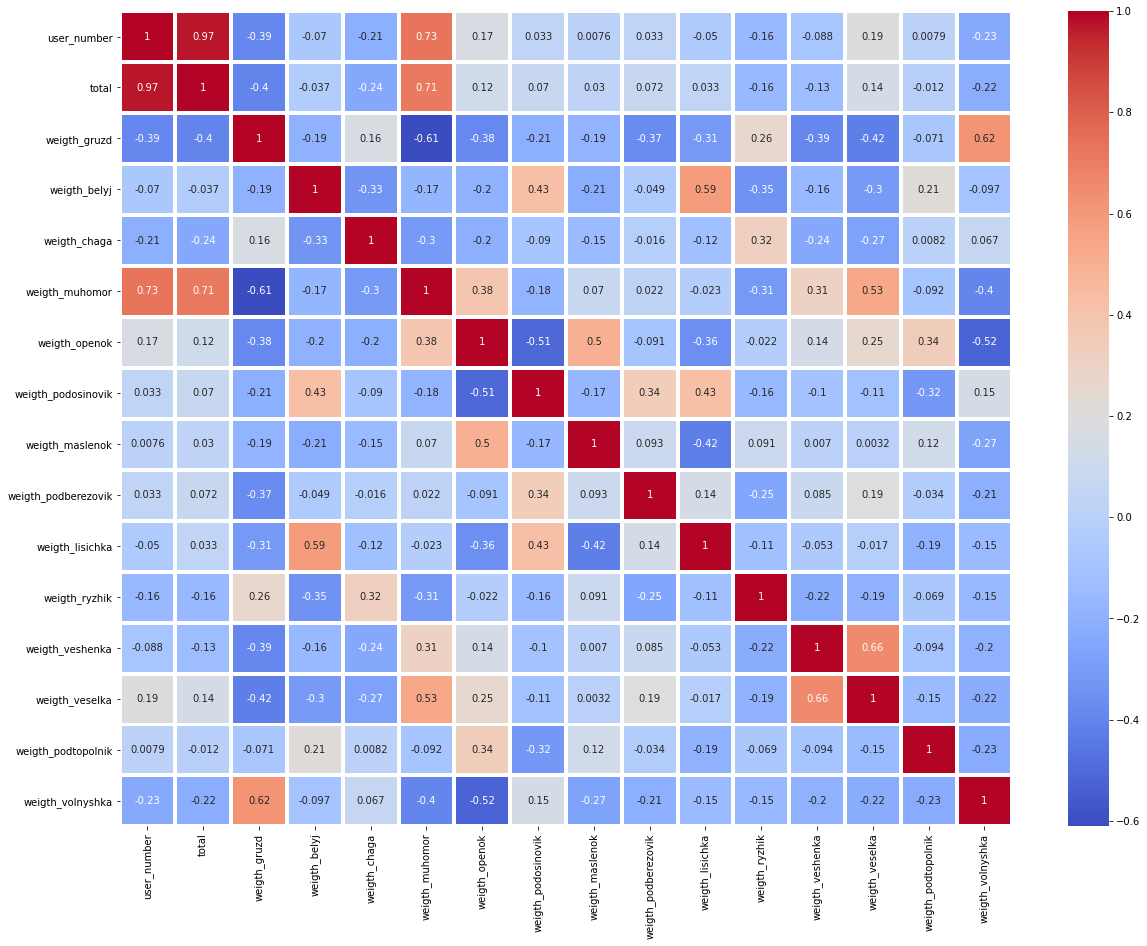

In [37]:
# тепловая карта

corr_matrix = new.corr()

sns.heatmap(
    corr_matrix,
    annot=True, cmap='coolwarm', linewidths=3.0,
    xticklabels=corr_matrix.columns.values, yticklabels=corr_matrix.columns.values
)

fig=plt.gcf()
fig.set_size_inches(20,15)
plt.show()

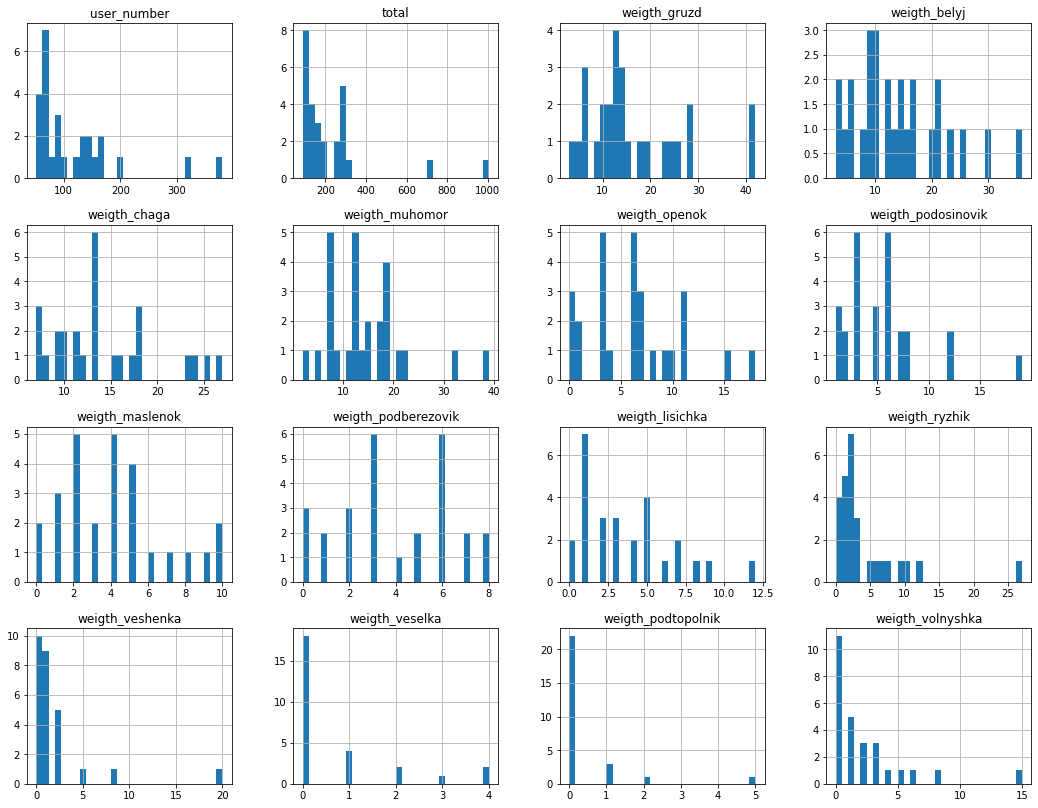

In [38]:
# Гистограммы

new.hist(bins=30, figsize=(18,14))
plt.show()

<AxesSubplot:xlabel='weigth_ryzhik'>

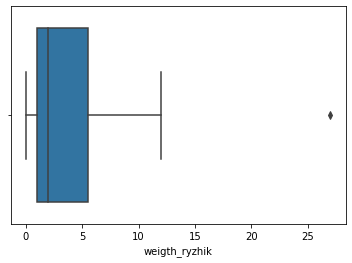

In [39]:
sns.boxplot(x=new.weigth_ryzhik)

In [33]:
#new.to_excel('C:/00_Projects/Rus_mushrooms/temp.xlsx', index=False)

### Плодовые, трутовики, мухоморы ###

In [ ]:
# Загружаю данные

work_types = pd.read_excel('C:/00_Projects/Rus_mushrooms/work.xlsx', sheet_name='regions_all')

In [ ]:
work_types.shape

In [ ]:
# удаляю пустые столбцы

# столбцы в список
list_columns = list(work_types.columns)


# если столбец пустой, удаляю
for column_name in list_columns:
    if work_types[column_name].sum() == 0:
        work_types.drop(column_name, axis=1, inplace=True)

In [ ]:
# удаляю чайный гриб

work_types.drop('чайный гриб', axis=1, inplace=True)

In [ ]:
work_types.shape

In [ ]:
# список грибов-трутовиков

polypores = [
    'просто трутовик',
    'трутовик березовый',
    'трутовик лакированный (рейши)',
    'трутовик лиственничный',
    'трутовик ложный дубовый',
    'трутовик окаймленный',
    'трутовик осиновый',
    'трутовик разноцветный',
    'трутовик серно-желтый',
    'трутовик смолистый',
    'трутовик яблоневый',
    'чага'
]

In [ ]:
# суммирую трутовики и удаляю единичные столбцы

work_types['трутовики'] = work_types[polypores].sum(axis=1)    


for mushroom in polypores: # удаляю больше ненужные
    work_types.drop(mushroom, axis=1, inplace=True)

In [ ]:
work_types.shape

In [ ]:
# считаю "обычные" грибы

work_types['плодовые'] = work_types.sum(axis=1) - work_types['трутовики'] - work_types['мухомор']

In [ ]:
new_work_types = work_types[['user_number', 'region', 'мухомор', 'плодовые', 'трутовики']]

In [ ]:
new_work_types.iloc[:, 2:5]

In [ ]:
new_work_types['total'] = new_work_types.iloc[:, 1:5].sum(axis=1)

In [ ]:
new_work_types['weigth_fly_agarics'] = round((new_work_types['мухомор'] / new_work_types.total) * 100, 0)
new_work_types['weigth_fruits'] = round((new_work_types['плодовые'] / new_work_types.total) * 100, 0)
new_work_types['weigth_polypores'] = round((new_work_types['трутовики'] / new_work_types.total) * 100, 0)

In [ ]:
new_work_types.iloc[:, 6:]

In [ ]:
# тепловая карта

corr_matrix = new_work_types[new_work_types.user_number >= 50].iloc[:, 6:].corr()

sns.heatmap(
    corr_matrix,
    annot=True, cmap='coolwarm', linewidths=3.0,
    xticklabels=corr_matrix.columns.values, yticklabels=corr_matrix.columns.values
)

fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

In [ ]:
new_work_types[new_work_types.user_number >= 50].shape

In [ ]:
# Гистограммы

new_work_types[new_work_types.user_number >= 50].iloc[:, 6:].hist(bins=27, figsize=(16, 12))
plt.show()

In [ ]:
boxplot = new_work_types[new_work_types.user_number >= 50].iloc[:, 6:].boxplot(figsize=(15,6), rot=90)

In [ ]:
# Записываю в файл нужные столбцы

#new_work_types.to_excel('C:/00_Projects/Rus_mushrooms/temp.xlsx', index=False)

### Грибы как лекарство ###

In [ ]:
# Загружаю данные

med_work = pd.read_excel('C:/00_Projects/Rus_mushrooms/work.xlsx', sheet_name='regions_all')

In [ ]:
med_work.shape

In [ ]:
# удаляю пустые столбцы

# столбцы в список
list_columns = list(med_work.columns)


# если столбец пустой, удаляю
for column_name in list_columns:
    if med_work[column_name].sum() == 0:
        med_work.drop(column_name, axis=1, inplace=True)

In [ ]:
med_work.shape

In [ ]:
# удаляю чайный гриб

med_work.drop('чайный гриб', axis=1, inplace=True)

In [ ]:
med_work.shape

In [ ]:
# список "медицинских" грибов

medical = [
    'просто трутовик',
    'трутовик березовый',
    'трутовик лакированный (рейши)',
    'трутовик лиственничный',
    'трутовик ложный дубовый',
    'трутовик окаймленный',
    'трутовик осиновый',
    'трутовик разноцветный',
    'трутовик серно-желтый',
    'трутовик смолистый',
    'трутовик яблоневый',
    'чага',
    'веселка',
    'ежовик',
    'кордицепс',
    'грифола',
    'агарик бразильский',
    'мацутакэ',
    'бледная поганка',
    'мухомор'
]

In [ ]:
# суммирую трутовики и удаляю единичные столбцы

# суммирую
med_work['medical'] = med_work[medical].sum(axis=1)

for mushroom in medical: # удаляю больше ненужные
    med_work.drop(mushroom, axis=1, inplace=True)

In [ ]:
# считаю съедобные грибы

med_work['edible'] = med_work.sum(axis=1) - med_work['medical']

In [ ]:
med_work['total'] = med_work.medical + med_work.edible

In [ ]:
med_work['weigth_medical'] = round((med_work['medical'] / med_work.total) * 100, 0)
med_work['weigth_edible'] = round((med_work['edible'] / med_work.total) * 100, 0)

In [ ]:
new_med_work = med_work[['user_number', 'region', 'weigth_medical', 'weigth_edible']]

In [ ]:
new_med_work = new_med_work[new_med_work.user_number >= 50]

In [ ]:
# тепловая карта

corr_matrix = new_med_work.corr()

sns.heatmap(
    corr_matrix,
    annot=True, cmap='coolwarm', linewidths=3.0,
    xticklabels=corr_matrix.columns.values, yticklabels=corr_matrix.columns.values
)

fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

In [ ]:
# Гистограммы

new_med_work.hist(bins=27, figsize=(16, 10))
plt.show()

In [ ]:
#new_med_work.to_excel('C:/00_Projects/Rus_mushrooms/temp.xlsx', index=False)

In [42]:
text = 'hello'

print(text[4:100])

o
